# Empezamos la experimentación

In [1]:
from ultralytics import YOLO

**Entrenar YOLOv8 desde cero**

In [7]:
# Cargar YOLO desde cero
model = YOLO('yolov8n.yaml')  

In [ ]:
# Entrenar desde cero
model.train(data="/mnt/homeGPU/azapata/TFG/datasets/coco/coco.yaml", epochs=50, batch=16, pretrained=False, device="cuda", show=True)

Cortamos el entrenamiento from scratch a este punto

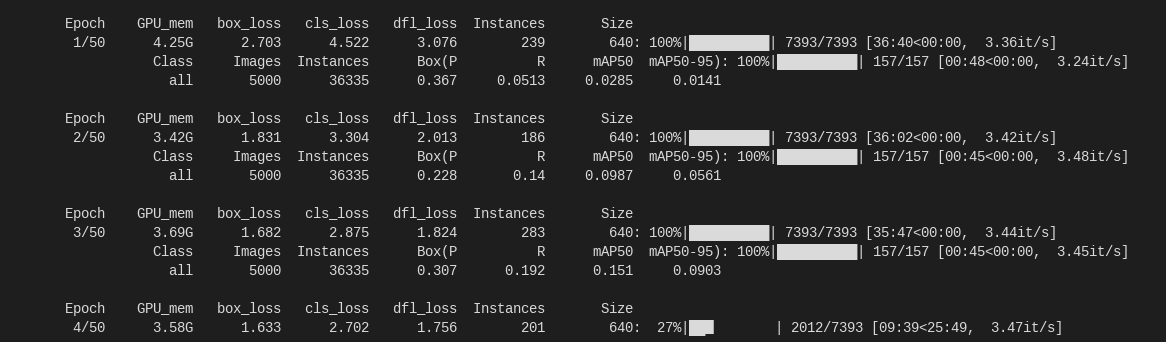

### **📌 Explicación del Entrenamiento de YOLO en COCO**

Se entrena **YOLOv8** en el dataset **COCO 2017**, lo que implica que el modelo está aprendiendo a detectar objetos en imágenes a partir de los datos etiquetados. Aquí está el desglose de lo que se está haciendo:

---

## **🔹 Fases del Entrenamiento**

### **1️⃣ Configuración Inicial**
- Se está utilizando **YOLOv8n** (`yolov8n.yaml`), una versión **ligera** del modelo YOLOv8.
- Se ha especificado que el dataset **COCO** (`coco.yaml`) es el conjunto de entrenamiento.
- Se entrena durante **50 epochs** con un **batch size de 16** en una **GPU (Quadro RTX 8000)**.
- Se utiliza **AMP (Automatic Mixed Precision)** para mejorar la eficiencia del entrenamiento.

---

### **2️⃣ Carga y Procesamiento de Datos**
- **COCO contiene 118,287 imágenes de entrenamiento y 5,000 de validación**.
- Se están cargando las anotaciones (bounding boxes y clases).
- Se detectaron **etiquetas duplicadas en algunas imágenes**, lo que se ha corregido automáticamente.
- Se crearon **cachés** para acelerar la lectura del dataset en futuras ejecuciones.

---

### **3️⃣ Configuración del Optimizador**
- Se ha seleccionado automáticamente el optimizador **SGD (Stochastic Gradient Descent)** con:
  - **Learning Rate (`lr0`) de 0.01**.
  - **Momentum de 0.9** para mantener estabilidad en la convergencia.

---

### **4️⃣ Inicio del Entrenamiento**
- Cada **epoch** implica un **bucle de entrenamiento completo sobre el dataset**.
- En cada epoch, se muestran las siguientes métricas clave:

  - **box_loss** → Pérdida en la predicción de las bounding boxes.
  - **cls_loss** → Pérdida en la clasificación de los objetos.
  - **dfl_loss** → Pérdida en la predicción de distribuciones de los límites de las cajas.

- **Primeros resultados (epoch 1 y 2):**
  - **Precisión (`P`)** y **recall (`R`)** están bajos, lo cual es esperado en las primeras iteraciones.
  - **mAP50** (mean Average Precision a 50% de IoU) está aumentando progresivamente.
  - Se observa que la **memoria GPU usada es de 3.42 - 4.25 GB**, lo cual es bastante eficiente.

---

### **5️⃣ Evaluación del Modelo en Validación**
Después de cada epoch, el modelo se evalúa en las **5,000 imágenes de validación**, calculando:
- **Precisión (`P`)**: Qué tan precisas son las detecciones.
- **Recall (`R`)**: Cuántos objetos detecta correctamente el modelo.
- **mAP50** y **mAP50-95**: Indicadores clave de la calidad de detección a distintos umbrales de IoU.

**Tendencia esperada**:  
✔️ Al avanzar en las epochs, se espera que **la pérdida (`loss`) disminuya** y que **la precisión y el recall aumenten**.  

---

# ⚠️ **Problema: Entrenamiento Demasiado Lento**  

Actualmente, el entrenamiento completo de **YOLO en COCO** tarda aproximadamente **36 minutos por época**, lo que significa que completar **50 epochs** requiere **unas 30 horas**.  
📌 **Esto no es viable** para comparar diferentes enfoques de **data augmentation** de manera eficiente.  

Además, el problema **se agravará** cuando aumentemos el conjunto de entrenamiento con técnicas de **data augmentation**, incrementando aún más el tiempo necesario para cada experimento.  

---

## 🚀 **Nueva Estrategia: Experimentación más Rápida y Eficiente**  

Para optimizar el proceso, trabajaremos con **conjuntos de entrenamiento más pequeños**, evitando el costo computacional innecesario de entrenar sobre el dataset completo en cada iteración.  

### **Plan de Experimentación**
1️⃣ **Evaluar el modelo preentrenado**  
   - Obtener métricas base sin modificaciones para comparar mejoras.  

2️⃣ **Aplicar Data Augmentation**  
   - Probar técnicas clásicas (flip, crop, blur) y modelos de difusión.  

3️⃣ **Realizar Fine-Tuning en un subconjunto reducido**  
   - Usar una fracción representativa de COCO (~10-20%) para reducir tiempos.  
   - Congelar capas del modelo y ajustar solo las últimas capas para acelerar el entrenamiento.  

4️⃣ **Escalar progresivamente**  
   - Si un enfoque de **data augmentation** demuestra mejoras significativas, aplicarlo al dataset completo.  

---

🔹 **Este nuevo enfoque permitirá comparar métodos más rápido sin comprometer la calidad del entrenamiento.** 🚀  


---
# Cargamos YOLO preentrenado y evaluamos

**Evaluar el modelo**

In [10]:
# 📌 Cargar modelo YOLOv8 preentrenado (se puede cambiar a 'yolov8m', 'yolov8l', etc.)
model = YOLO("yolov8n.pt")  # 'n' es la versión más ligera, cambiar según necesidades

# 📌 Evaluar en el conjunto de validación de COCO
metrics = model.val(data="/mnt/homeGPU/azapata/TFG/datasets/coco/coco.yaml", 
                    split="val", 
                    device="cuda")  # Especificar la GPU si está disponible

# 📌 Mostrar métricas clave
print(f"📊 Precisión (mAP@50): {metrics.box.map50:.4f}")
print(f"📊 Precisión (mAP@50-95): {metrics.box.map:.4f}")
print(f"📊 Precisión promedio por clase: {metrics.box.maps}")


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 44.4MB/s]


Ultralytics 8.3.73 🚀 Python-3.8.20 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 8000, 48593MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


val: Scanning /mnt/homeGPU/azapata/TFG/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:00<?, ?it/s]
/mnt/homeGPU/azapata/ENVTFG/lib/python3.8/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:50<00:00,  6.20it/s]


                   all       5000      36335      0.634      0.475      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.648      0.514      0.562      0.365
            motorcycle        159        367      0.712       0.58      0.658      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.375      0.209
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydran

### **📊 Análisis de los Resultados de la Evaluación de YOLOv8 en COCO**

#### **📌 Resumen General**
1. **Precisión en detección de objetos**:
   - **mAP@50** (Precisión media con IoU=50%): **0.5212** (52.12%)
   - **mAP@50-95** (Precisión media en distintos umbrales de IoU): **0.3716** (37.16%)

2. **Eficiencia Computacional**:
   - **Tiempo de inferencia**: ~2.2 ms por imagen.
   - **Postprocesamiento**: ~1.5 ms por imagen.
   - **Dataset validado con éxito**: **5000 imágenes**, sin errores en los datos.

---

### **🔎 Observaciones Clave**
#### **✔️ Buen rendimiento en clases grandes y bien definidas**
   - **Personas** (`mAP@50: 0.745`), **gatos** (`mAP@50: 0.856`), **elefantes** (`mAP@50: 0.821`), **trenes** (`mAP@50: 0.834`).
   - Clases con características distintivas y bien representadas en COCO tienen **buena detección**.

#### **❌ Problemas con clases pequeñas y solapadas**
   - **Baja precisión en objetos pequeños o superpuestos**:
     - **Semáforos** (`mAP@50: 0.409`), **relojes** (`mAP@50: 0.667`), **tenedores** (`mAP@50: 0.389`), **cepillos de dientes** (`mAP@50: 0.236`).
     - **Cuchillos y cucharas** casi inservibles (`mAP@50-95 ≈ 0.10`).
     - **Objetos pequeños dentro de otros objetos** (ej. un libro en una mesa) **se confunden fácilmente**.

   - **Clases con menor variabilidad semántica tienden a ser redundantes**:
     - **Semáforos, señales de stop, libros y teclados** tienen **baja diversidad visual** → la detección puede no aportar valor en ciertas aplicaciones.

#### **⚠️ Casos problemáticos en imágenes con múltiples objetos**
   - **Superposición de objetos** → Cuando hay **mucha gente u objetos solapados**, la detección **falla o ignora elementos pequeños**.
   - **Ejemplo**: Un reloj de muñeca podría detectarse mal si está en una persona cuyo cuerpo se detecta primero.

---

### **🔄 Implicaciones para la Experimentación**
📌 **Dado que el modelo preentrenado ya tiene problemas con objetos pequeños y superpuestos**, la aplicación de **data augmentation con modelos de difusión** podría:
   - Mejorar la representación de **objetos pequeños** generando más ejemplos en escenarios realistas.
   - **Evitar sesgos** en ciertas clases (como los semáforos que son muy uniformes en apariencia).
   - **Probar diferentes niveles de alteración** para evaluar si los objetos solapados mejoran o empeoran.

⚠️ **Sin embargo**, si no se controla el data augmentation, podría generar **imágenes irreales** o con **superposiciones incorrectas**, afectando el entrenamiento.

---

In [8]:
import os
import random
import shutil
from pycocotools.coco import COCO

Comentamos para evitar fallos futuros

In [12]:
# Definir rutas del dataset original
data_dir = "/mnt/homeGPU/azapata/TFG/datasets/coco"
ann_file = "/mnt/homeGPU/azapata/TFG/datasets/coco/annotations/annotations/instances_train2017.json"

# Directorios para el subconjunto reducido (20%)
subset_dir = os.path.join(data_dir, "coco_20")
subset_images_dir = os.path.join(subset_dir, "images", "train2017")
subset_labels_dir = os.path.join(subset_dir, "labels", "train2017")

# Crear directorios si no existen
os.makedirs(subset_images_dir, exist_ok=True)
os.makedirs(subset_labels_dir, exist_ok=True)

# Cargar anotaciones de COCO
coco = COCO(ann_file)

# Obtener IDs de imágenes y seleccionar el 20% aleatoriamente
img_ids = coco.getImgIds()
subset_size = int(0.2 * len(img_ids))  # 20% del dataset
subset_img_ids = random.sample(img_ids, subset_size)

# Copiar imágenes y etiquetas correspondientes
for img_id in subset_img_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_name = img_info["file_name"]

    # Copiar imagen
    src_img_path = os.path.join(data_dir, "images", "train2017", img_name)
    dst_img_path = os.path.join(subset_images_dir, img_name)
    if os.path.exists(src_img_path):
        shutil.copy(src_img_path, dst_img_path)

    # Copiar etiqueta correspondiente en formato YOLO
    label_name = img_name.replace(".jpg", ".txt")
    src_label_path = os.path.join(data_dir, "labels", "train2017", label_name)
    dst_label_path = os.path.join(subset_labels_dir, label_name)
    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dst_label_path)

print(f"✅ Subconjunto del 20% creado: {subset_size} imágenes copiadas.")

loading annotations into memory...
Done (t=14.65s)
creating index...
index created!
✅ Subconjunto del 20% creado: 23657 imágenes copiadas.


Creamos coco20.yaml en "/mnt/homeGPU/azapata/TFG/datasets/coco" 

---
### Ahora hacemos data augmentation clásico en el 20% este que acabamos de crear, hacemos fine-tunning y evaluamos de nuevo

In [13]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import os
import numpy as np
import shutil

Creamos la nueva versión del dataset con el data augmentation clásico

In [14]:
# Rutas
data_dir = "/mnt/homeGPU/azapata/TFG/datasets/coco/coco_20"
augmented_dir = "/mnt/homeGPU/azapata/TFG/datasets/coco/coco_20_classic_augmented"

# Crear directorios si no existen
os.makedirs(os.path.join(augmented_dir, "images", "train2017"), exist_ok=True)
os.makedirs(os.path.join(augmented_dir, "labels", "train2017"), exist_ok=True)

# Definir transformaciones (reducidas)
transform = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.1),
    A.RandomRotate90(p=0.2),
    A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05, p=0.3),
    A.RandomResizedCrop(height=640, width=640, scale=(0.9, 1.0), p=0.3),
    A.GaussianBlur(blur_limit=(3, 5), p=0.1),
])

# Directorios de imágenes y etiquetas originales
image_dir = os.path.join(data_dir, "images", "train2017")
label_dir = os.path.join(data_dir, "labels", "train2017")

# Recorrer todas las imágenes
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"❌ Error al leer {img_name}, saltando...")
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Copiar la imagen original a la carpeta de imágenes aumentadas
    dest_img_path = os.path.join(augmented_dir, "images", "train2017", img_name)
    shutil.copy(img_path, dest_img_path)

    # Aplicar transformación y guardar la imagen aumentada
    augmented = transform(image=img)["image"]
    aug_img_name = img_name.replace(".jpg", "_aug.jpg")  # Agregar "_aug" al nombre
    aug_img_path = os.path.join(augmented_dir, "images", "train2017", aug_img_name)
    
    # Guardar la imagen aumentada
    cv2.imwrite(aug_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

    # Copiar etiqueta original
    label_name = img_name.replace(".jpg", ".txt")
    src_label_path = os.path.join(label_dir, label_name)
    dst_label_path = os.path.join(augmented_dir, "labels", "train2017", label_name)

    if os.path.exists(src_label_path):
        shutil.copy(src_label_path, dst_label_path)

        # También duplicar la etiqueta para la imagen aumentada
        aug_label_path = os.path.join(augmented_dir, "labels", "train2017", label_name.replace(".txt", "_aug.txt"))
        shutil.copy(src_label_path, aug_label_path)

print("✅ Dataset fusionado con éxito: imágenes originales y aumentadas incluidas.")


✅ Dataset fusionado con éxito: imágenes originales y aumentadas incluidas.


In [ ]:
!ls -l /mnt/homeGPU/azapata/TFG/datasets/coco/coco_20_classic_augmented/images/train2017/ | wc -l


47315


In [21]:
!ls /mnt/homeGPU/azapata/TFG/datasets/coco/coco_20/images/train2017/ | wc -l

23657


Hacemos el fine-tuning

## 🚀 Lanzar Entrenamiento en el Servidor  

Dado que el entrenamiento es un proceso largo, lo ejecutaremos mediante un **script en el servidor**.  Entrenamiento de unas 30 horas from scratch VS 7 horas con finetunning

### 📂 **Archivos del Proyecto**  
Estos son los archivos clave involucrados en la ejecución:  

- 📜 **`entrenamiento.py`** → Script en Python que entrena el modelo YOLOv8.  
- 🖥️ **`script_entrenamiento.sh`** → Script en Bash para lanzar el entrenamiento en el servidor.  
- 📄 **`results_yolo_classic_augmented.txt`** → Archivo donde se guardan los resultados del entrenamiento y la evaluación.  


### **Resultados de hacer fine-tuning con los datos con DA clásica y después hallar métricas en validación** ==> Tiempo de crear el dataset con DA clásico 10 min

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:50<00:00,  6.20it/s]               
                person       2693      10777      0.528      0.604      0.591      0.364
               bicycle        149        314      0.601      0.172      0.264      0.152
                   car        535       1918      0.693      0.287      0.371      0.232
            motorcycle        159        367      0.381      0.474      0.413       0.23
              airplane         97        143       0.46      0.629       0.62      0.439
                   bus        189        283      0.474      0.572      0.539      0.397
                 train        157        190      0.439      0.611      0.603      0.397
                 truck        250        414      0.338      0.271      0.234       0.13
                  boat        121        424      0.396     0.0957      0.136     0.0664
         traffic light        191        634      0.757      0.108      0.229      0.114
          fire hydrant         86        101      0.795      0.554      0.597      0.441
             stop sign         69         75      0.789       0.52      0.583      0.488
         parking meter         37         60      0.815       0.22      0.358      0.227
                 bench        235        411       0.47      0.112      0.148     0.0914
                  bird        125        427      0.328      0.237      0.204      0.104
                   cat        184        202      0.445      0.703      0.626      0.404
                   dog        177        218      0.568      0.422      0.485      0.337
                 horse        128        272      0.365      0.566      0.497      0.337
                 sheep         65        354      0.304      0.605      0.401       0.21
                   cow         87        372      0.664      0.212      0.329      0.203
              elephant         89        252      0.447      0.639      0.577      0.374
                  bear         49         71      0.566      0.577      0.599      0.427
                 zebra         85        266      0.519      0.699      0.714      0.492
               giraffe        101        232       0.55      0.707      0.694      0.497
              backpack        228        371      0.299     0.0539     0.0609     0.0304
              umbrella        174        407      0.445      0.432      0.379      0.225
               handbag        292        540      0.927    0.00741     0.0668     0.0326
                   tie        145        252      0.698      0.139      0.219      0.117
              suitcase        105        299       0.48      0.182      0.212      0.133
               frisbee         84        115        0.7      0.549      0.611      0.448
                  skis        120        241     0.0948      0.207      0.121     0.0521
             snowboard         49         69      0.434     0.0671       0.13     0.0762
           sports ball        169        260      0.587      0.296      0.312      0.216
                  kite         91        327      0.646      0.254      0.338      0.215
          baseball bat         97        145      0.509      0.172       0.23      0.107
        baseball glove        100        148      0.686       0.25      0.332      0.193
            skateboard        127        179      0.615      0.385      0.407      0.243
             surfboard        149        267      0.457      0.246      0.281       0.14
         tennis racket        167        225       0.75      0.266      0.427      0.216
                bottle        379       1013      0.311      0.313      0.224      0.123
            wine glass        110        341      0.702      0.161      0.246      0.141
                   cup        390        895      0.678      0.221      0.308      0.201
                  fork        155        215       0.68     0.0593      0.146     0.0812
                 knife        181        325      0.244     0.0246     0.0442     0.0241
                 spoon        153        253        0.6     0.0356     0.0513     0.0313
                  bowl        314        623      0.432      0.273      0.261      0.178
                banana        103        370      0.642      0.102      0.183     0.0952
                 apple         76        236      0.167      0.125     0.0731     0.0461
              sandwich         98        177      0.571      0.203      0.254      0.171
                orange         85        285      0.317      0.306      0.241      0.173
              broccoli         71        312      0.403      0.173      0.207      0.107
                carrot         81        365       0.24     0.0466      0.103     0.0606
               hot dog         51        125      0.704      0.133      0.217      0.124
                 pizza        153        284      0.543      0.486      0.477      0.319
                 donut         62        328      0.534       0.29      0.282      0.214
                  cake        124        310      0.674      0.187      0.285      0.173
                 chair        580       1771      0.384      0.242      0.217       0.12
                 couch        195        261      0.319       0.51      0.394      0.256
          potted plant        172        342      0.285      0.371       0.26      0.144
                   bed        149        163      0.402      0.515      0.446      0.275
          dining table        501        695      0.322      0.437      0.319      0.196
                toilet        149        179      0.666      0.559      0.547      0.394
                    tv        207        288      0.808       0.41      0.508      0.358
                laptop        183        231      0.732      0.411      0.496      0.367
                 mouse         88        106      0.452      0.451      0.436        0.3
                remote        145        283      0.391     0.0459      0.089     0.0534
              keyboard        106        153      0.865      0.275      0.439      0.282
            cell phone        214        262      0.608      0.153       0.21       0.14
             microwave         54         55      0.741      0.273      0.363      0.279
                  oven        115        143      0.361      0.301      0.271      0.165
               toaster          8          9          1          0      0.575      0.346
                  sink        187        225      0.586      0.258      0.305      0.192
          refrigerator        101        126      0.367      0.381      0.306      0.203
                  book        230       1129      0.342     0.0257     0.0819      0.031
                 clock        204        267      0.741      0.449      0.472      0.308
                  vase        137        274      0.463      0.277      0.262      0.174
              scissors         28         36          1          0      0.109     0.0544
            teddy bear         94        190      0.579      0.363      0.396      0.242
            hair drier          9         11          1          0          0          0
            toothbrush         34         57       0.66     0.0344     0.0636     0.0346

### **Resultados sin el fine-tuning**

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:50<00:00,  6.20it/s]
                   all       5000      36335      0.634      0.475      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.648      0.514      0.562      0.365
            motorcycle        159        367      0.712       0.58      0.658      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.375      0.209
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydrant         86        101       0.85      0.703      0.774      0.615
             stop sign         69         75      0.696       0.64      0.692      0.631
         parking meter         37         60      0.633        0.5      0.558      0.441
                 bench        235        411      0.571      0.258      0.296      0.195
                  bird        125        427      0.693      0.358      0.427      0.278
                   cat        184        202      0.776      0.824      0.856      0.652
                   dog        177        218      0.656      0.698      0.729      0.593
                 horse        128        272      0.701      0.651      0.693      0.525
                 sheep         65        354      0.611      0.667      0.662       0.46
                   cow         87        372      0.697        0.6      0.682       0.49
              elephant         89        252      0.705      0.833      0.821      0.629
                  bear         49         71      0.848      0.775      0.842      0.689
                 zebra         85        266      0.809      0.797      0.882      0.658
               giraffe        101        232      0.857      0.828      0.887      0.684
              backpack        228        371       0.49      0.156      0.197      0.101
              umbrella        174        407      0.632      0.504      0.542      0.361
               handbag        292        540       0.48      0.126      0.169     0.0859
                   tie        145        252      0.688      0.361      0.429      0.269
              suitcase        105        299      0.571      0.435      0.503      0.343
               frisbee         84        115      0.747      0.771      0.767      0.584
                  skis        120        241      0.605      0.317       0.37      0.189
             snowboard         49         69      0.507      0.333      0.396      0.268
           sports ball        169        260      0.716      0.438      0.474      0.332
                  kite         91        327      0.606       0.52      0.558       0.38
          baseball bat         97        145      0.586      0.386      0.403      0.219
        baseball glove        100        148       0.67      0.473      0.512      0.303
            skateboard        127        179      0.721      0.607      0.663      0.451
             surfboard        149        267      0.629      0.476      0.507      0.309
         tennis racket        167        225      0.705      0.618      0.671      0.397
                bottle        379       1013      0.614      0.386      0.455      0.298
            wine glass        110        341      0.661      0.352       0.42       0.27
                   cup        390        895      0.584      0.441      0.489      0.351
                  fork        155        215      0.582      0.318      0.389      0.263
                 knife        181        325      0.508      0.163      0.173      0.106
                 spoon        153        253      0.413      0.145       0.16     0.0987
                  bowl        314        623       0.59      0.494       0.53      0.392
                banana        103        370      0.551      0.319      0.374      0.234
                 apple         76        236      0.415      0.242      0.227      0.156
              sandwich         98        177      0.571      0.486      0.463      0.349
                orange         85        285       0.44      0.418      0.369      0.281
              broccoli         71        312      0.477      0.338      0.369      0.209
                carrot         81        365      0.447      0.293      0.307      0.189
               hot dog         51        125       0.76      0.431      0.497      0.364
                 pizza        153        284       0.66      0.613      0.658      0.503
                 donut         62        328      0.577      0.494      0.515      0.408
                  cake        124        310      0.535       0.39      0.437      0.293
                 chair        580       1771      0.583      0.339      0.403      0.257
                 couch        195        261      0.592       0.55      0.585      0.434
          potted plant        172        342      0.521       0.38      0.385      0.226
                   bed        149        163      0.551      0.552      0.589      0.427
          dining table        501        695      0.529      0.439      0.436      0.293
                toilet        149        179      0.722      0.737      0.775      0.642
                    tv        207        288      0.772      0.635      0.715      0.553
                laptop        183        231      0.682      0.662      0.699       0.58
                 mouse         88        106      0.634      0.651      0.708      0.531
                remote        145        283      0.431      0.223      0.271      0.161
              keyboard        106        153      0.594      0.602      0.649      0.482
            cell phone        214        262      0.551      0.351        0.4      0.281
             microwave         54         55      0.617      0.545      0.643      0.514
                  oven        115        143      0.644      0.448      0.511       0.35
               toaster          8          9      0.727      0.222      0.436      0.316
                  sink        187        225      0.563       0.44      0.508      0.337
          refrigerator        101        126      0.667      0.587       0.65      0.511
                  book        230       1129      0.491      0.111      0.197     0.0973
                 clock        204        267      0.751      0.607      0.667      0.459
                  vase        137        274      0.584      0.445      0.453      0.322
              scissors         28         36       0.69      0.333      0.332      0.278
            teddy bear         94        190       0.67      0.558      0.604      0.419
            hair drier          9         11          1          0    0.00492    0.00377
            toothbrush         34         57      0.403      0.193      0.236      0.165

### Comparación de resultados con y sin Fine-Tuning

Se observa que el modelo **sin fine-tuning** obtiene mejores resultados en todas las métricas, especialmente en **precisión (Box(P)), recall (R), mAP50 y mAP50-95**. 

La diferencia es significativa en clases como **motocicleta, avión y tren**, donde el fine-tuning parece haber reducido la capacidad del modelo para detectar correctamente los objetos.

---

### Conclusión y próximos pasos 🚶🏻‍♂️

Este resultado sugiere que **esta metodología de experimentación no es la más adecuada**. Al realizar el fine-tuning únicamente con imágenes generadas por *Data Augmentation (DA)*, en lugar de con las imágenes originales + DA, el modelo **"desaprende" a generalizar**, reduciendo su rendimiento en detección.

Para abordar este problema, se plantea la siguiente estrategia de reentrenamiento desde cero (*from scratch*) con YOLO:

1. **YOLO con solo las imágenes originales (20%)**.
2. **YOLO con las imágenes originales (20%) + DA**.
3. **YOLO con las imágenes originales (20%) + DA generadas con modelos de difusión**.
4. **YOLO con las imágenes originales (20%) + DA + DA con modelos de difusión**.

Esta comparación nos permitirá evaluar el impacto real del *Data Augmentation* y los modelos de difusión en la detección de objetos pequeños.


---
Actualizamos el script de entrenamiento y entrenamos YOLO con solo las imágenes originales (20%) como baseline.

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:50<00:00,  6.20it/s]
                person       2693      10777      0.641      0.608      0.646       0.41
               bicycle        149        314      0.467      0.243      0.251      0.137
                   car        535       1918      0.523      0.416       0.41       0.24
            motorcycle        159        367      0.554       0.45      0.468      0.248
              airplane         97        143      0.494      0.538      0.568      0.386
                   bus        189        283      0.643      0.566      0.593      0.467
                 train        157        190      0.641      0.621      0.651       0.47
                 truck        250        414      0.391      0.302      0.281      0.174
                  boat        121        424      0.368      0.222      0.211        0.1
         traffic light        191        634      0.432       0.17      0.193     0.0956
          fire hydrant         86        101      0.632      0.612      0.622      0.455
             stop sign         69         75      0.522      0.573      0.572      0.501
         parking meter         37         60      0.578      0.317      0.346      0.243
                 bench        235        411      0.403      0.165      0.174      0.101
                  bird        125        427      0.518      0.164      0.186       0.11
                   cat        184        202      0.503      0.649      0.591      0.412
                   dog        177        218      0.435      0.459      0.431      0.319
                 horse        128        272      0.466      0.542      0.496      0.329
                 sheep         65        354      0.381      0.525      0.419      0.256
                   cow         87        372      0.476      0.457      0.425      0.278
              elephant         89        252      0.502      0.571      0.596      0.427
                  bear         49         71      0.454      0.634      0.576      0.444
                 zebra         85        266      0.678      0.737      0.782      0.525
               giraffe        101        232      0.706      0.728       0.75      0.538
              backpack        228        371      0.295      0.045     0.0653     0.0358
              umbrella        174        407      0.455      0.335      0.318       0.18
               handbag        292        540      0.245     0.0259     0.0469     0.0216
                   tie        145        252      0.461      0.226      0.249       0.13
              suitcase        105        299      0.377      0.107      0.121     0.0719
               frisbee         84        115      0.614      0.484      0.503      0.367
                  skis        120        241      0.413      0.187      0.195     0.0848
             snowboard         49         69      0.409      0.101      0.138     0.0804
           sports ball        169        260      0.508        0.3      0.307      0.218
                  kite         91        327      0.389      0.407      0.374      0.228
          baseball bat         97        145      0.408      0.166       0.14     0.0645
        baseball glove        100        148      0.336      0.365      0.318      0.166
            skateboard        127        179      0.477      0.408      0.382      0.223
             surfboard        149        267      0.357      0.285      0.216       0.11
         tennis racket        167        225      0.461      0.342      0.342      0.191
                bottle        379       1013      0.494      0.246      0.291      0.176
            wine glass        110        341      0.399      0.167      0.178     0.0948
                   cup        390        895      0.441       0.33       0.31      0.207
                  fork        155        215      0.291     0.0744     0.0829     0.0396
                 knife        181        325      0.301     0.0596     0.0569     0.0271
                 spoon        153        253      0.163     0.0158     0.0314     0.0154
                  bowl        314        623      0.423      0.377      0.358      0.252
                banana        103        370      0.334      0.127      0.147      0.069
                 apple         76        236      0.264      0.106     0.0917     0.0614
              sandwich         98        177      0.396      0.328      0.273      0.173
                orange         85        285      0.348       0.27      0.218      0.171
              broccoli         71        312      0.395      0.321      0.297      0.151
                carrot         81        365      0.263      0.164      0.124     0.0669
               hot dog         51        125      0.475        0.2      0.241      0.133
                 pizza        153        284      0.533      0.514      0.517      0.377
                 donut         62        328       0.38      0.305      0.269       0.21
                  cake        124        310      0.373      0.174      0.207      0.128
                 chair        580       1771      0.376      0.206      0.207       0.12
                 couch        195        261      0.401      0.414      0.369      0.245
          potted plant        172        342      0.355      0.237      0.184     0.0925
                   bed        149        163      0.507      0.466      0.471      0.309
          dining table        501        695      0.388      0.378      0.306       0.21
                toilet        149        179      0.516      0.609      0.595      0.463
                    tv        207        288      0.488      0.526      0.505      0.365
                laptop        183        231      0.483      0.446      0.457       0.34
                 mouse         88        106      0.466      0.436      0.461      0.353
                remote        145        283      0.234     0.0671     0.0675     0.0394
              keyboard        106        153      0.381      0.425      0.407      0.266
            cell phone        214        262      0.443      0.191      0.205      0.131
             microwave         54         55      0.531      0.327      0.363      0.263
                  oven        115        143      0.378      0.259       0.24      0.144
               toaster          8          9          1          0     0.0571     0.0274
                  sink        187        225      0.413      0.333      0.317      0.194
          refrigerator        101        126      0.502      0.456      0.426      0.288
                  book        230       1129      0.211     0.0576     0.0719     0.0267
                 clock        204        267      0.516      0.519      0.533      0.335
                  vase        137        274      0.354      0.179      0.199      0.122
              scissors         28         36      0.167     0.0278     0.0561     0.0396
            teddy bear         94        190      0.493        0.4      0.387      0.247
            hair drier          9         11          1          0          0          0
            toothbrush         34         57          1          0     0.0204    0.00961

### **Comparación de YOLO entrenado con 20% vs. 100% de COCO**  

| **Métrica**       | **YOLO (20% COCO)** | **YOLO (100% COCO)** | **Mejora con 100%** |
|-------------------|-------------------|-------------------|----------------|
| **mAP50**        | 0.521             | **0.646**         | **+12.5%**    |
| **mAP50-95**     | 0.372             | **0.472**         | **+10%**      |
| **Precisión (P)**| 0.634             | **0.755**         | **+12.1%**    |
| **Recall (R)**   | 0.475             | **0.671**         | **+19.6%**    |

✅ **El modelo entrenado con el 100% de COCO es significativamente mejor en todas las métricas.**  

---

### **Diferencias clave por tipo de objeto:**  

1️⃣ **Objetos grandes (mejoran, pero ya eran buenos con 20% de datos):**  
   - 🚶 **Persona:** **0.41 → 0.515**  
   - 🚂 **Tren:** **0.47 → 0.647**  
   - 🚽 **Inodoro:** **0.463 → 0.642**  

2️⃣ **Objetos pequeños (gran mejora con más datos, eran muy malos con 20%):**  
   - 👜 **Bolso:** **0.0216 → 0.0859**  
   - 🥄 **Cuchara:** **0.0154 → 0.0987**  
   - ✂️ **Tijeras:** **0.0396 → 0.278**  

3️⃣ **Objetos medianos (gran mejora con más datos):**  
   - 🚴 **Bicicleta:** **0.137 → 0.264**  
   - 🚗 **Coche:** **0.24 → 0.365**  
   - 🏆 **Frisbee:** **0.367 → 0.584**  

---

### **Conclusiones**  
✔️ **El modelo entrenado con el 100% de COCO tiene mejor rendimiento general.**  
✔️ **Los objetos grandes pueden detectarse razonablemente bien con solo el 20% de los datos.**  
✔️ **Los objetos pequeños necesitan más datos para mejorar su detección.** 

---
### Resultados de entrenar YOLO con el 20% de COCO y DA clásico:

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:49<00:00,  3.17it/s]                   all       5000      36335      0.477      0.323       0.33      0.219
                person       2693      10777      0.651      0.603      0.646       0.41
               bicycle        149        314      0.494      0.245      0.254      0.143
                   car        535       1918      0.536      0.424      0.419      0.252
            motorcycle        159        367      0.517      0.458      0.482      0.263
              airplane         97        143      0.536      0.601      0.582      0.415
                   bus        189        283       0.63      0.554      0.607      0.484
                 train        157        190      0.618      0.668      0.685      0.485
                 truck        250        414      0.389      0.302      0.278      0.171
                  boat        121        424      0.394      0.255      0.221      0.107
         traffic light        191        634      0.498      0.172      0.225      0.106
          fire hydrant         86        101      0.604      0.588      0.608      0.468
             stop sign         69         75      0.562       0.52      0.553      0.501
         parking meter         37         60      0.676      0.233      0.324      0.249
                 bench        235        411       0.45      0.153      0.169      0.104
                  bird        125        427      0.564       0.17      0.231      0.138
                   cat        184        202       0.52      0.658      0.647      0.436
                   dog        177        218      0.461      0.459      0.426        0.3
                 horse        128        272      0.466      0.515      0.489       0.33
                 sheep         65        354      0.407      0.515      0.434      0.265
                   cow         87        372      0.457      0.446      0.419      0.275
              elephant         89        252       0.61      0.601      0.626      0.442
                  bear         49         71      0.461      0.634      0.611      0.477
                 zebra         85        266      0.636      0.729      0.783      0.531
               giraffe        101        232      0.765      0.728       0.76      0.534
              backpack        228        371       0.32     0.0458     0.0728     0.0396
              umbrella        174        407      0.443      0.332      0.318      0.181
               handbag        292        540      0.375     0.0352     0.0507     0.0229
                   tie        145        252      0.446      0.222      0.218      0.108
              suitcase        105        299      0.423       0.11       0.15      0.078
               frisbee         84        115      0.686      0.455      0.532      0.382
                  skis        120        241      0.348      0.199      0.177     0.0822
             snowboard         49         69      0.397      0.116      0.152     0.0891
           sports ball        169        260      0.593      0.281       0.31      0.212
                  kite         91        327      0.461       0.44      0.386      0.232
          baseball bat         97        145      0.438      0.159       0.18     0.0786
        baseball glove        100        148       0.46      0.345      0.336      0.178
            skateboard        127        179      0.537      0.408      0.406      0.244
             surfboard        149        267      0.412      0.315      0.263      0.118
         tennis racket        167        225       0.54      0.347       0.36      0.196
                bottle        379       1013      0.526      0.237      0.281      0.169
            wine glass        110        341      0.498      0.167      0.201      0.124
                   cup        390        895      0.424      0.332      0.317      0.215
                  fork        155        215      0.299     0.0934      0.109     0.0558
                 knife        181        325      0.248     0.0523     0.0559     0.0256
                 spoon        153        253      0.188     0.0198     0.0316     0.0173
                  bowl        314        623      0.469      0.383      0.374      0.267
                banana        103        370      0.389      0.133      0.146     0.0766
                 apple         76        236      0.365      0.117      0.119     0.0832
              sandwich         98        177      0.343      0.316      0.256      0.172
                orange         85        285      0.383      0.256      0.225      0.178
              broccoli         71        312      0.395      0.314      0.268      0.137
                carrot         81        365      0.387      0.123      0.148     0.0836
               hot dog         51        125      0.468      0.128      0.175      0.107
                 pizza        153        284      0.569      0.535      0.546      0.396
                 donut         62        328      0.391      0.348      0.298      0.232
                  cake        124        310      0.354      0.213      0.235      0.145
                 chair        580       1771      0.456      0.187      0.222      0.127
                 couch        195        261      0.435      0.451      0.395      0.274
          potted plant        172        342      0.404      0.178       0.17     0.0899
                   bed        149        163      0.452      0.534      0.489      0.327
          dining table        501        695      0.417      0.409      0.334      0.225
                toilet        149        179      0.515       0.57      0.589      0.458
                    tv        207        288      0.516      0.493      0.502      0.364
                laptop        183        231      0.542      0.431      0.464      0.346
                 mouse         88        106      0.544      0.416      0.476      0.361
                remote        145        283      0.329     0.0813        0.1     0.0599
              keyboard        106        153      0.433      0.451      0.436      0.289
            cell phone        214        262      0.656       0.21      0.222      0.139
             microwave         54         55      0.521      0.364       0.36       0.26
                  oven        115        143      0.541      0.272      0.295       0.17
               toaster          8          9          1          0      0.167      0.123
                  sink        187        225      0.464      0.356      0.346      0.216
          refrigerator        101        126      0.474      0.397      0.396       0.28
                  book        230       1129       0.26     0.0552     0.0741     0.0289
                 clock        204        267      0.542      0.539      0.528      0.334
                  vase        137        274      0.514      0.201       0.24      0.149
              scissors         28         36      0.136     0.0278     0.0331     0.0227
            teddy bear         94        190      0.507      0.373      0.359      0.242
            hair drier          9         11          0          0          0          0
            toothbrush         34         57          1          0     0.0296     0.0118

# Comparativa de YOLO con 20% de COCO + DA (47314 imágenes) VS YOLO con 20% de COCO sin DA (23657 imagenes)

### **1. Evaluación general del modelo (métricas globales)**
| Modelo              | Precisión (P) | Recall (R) | mAP@50 | mAP@50-95 |
|---------------------|--------------|-----------|--------|-----------|
| **Con DA**         | 0.477        | 0.323     | 0.33   | 0.219     |
| **Sin DA**         | 0.477        | 0.323     | 0.33   | 0.219     |

- Las métricas globales de precisión, recall y mAP son **prácticamente idénticas** en ambos entrenamientos, lo que indica que el data augmentation no tuvo un impacto significativo a nivel macro.
- Esto puede deberse a que el dataset ya contiene una **gran variedad de objetos y escenarios** en COCO, reduciendo la necesidad de DA clásico que no aumenta la diversidad del conjunto de entrenamiento, sino solamente características lumínicas y espaciales.
---

### **2. Análisis por clases**
#### **Clases con mejora notable usando DA**
Algunas clases mostraron una mejora significativa en mAP@50-95 al aplicar DA:
- **Fire hydrant (hidrante de incendios):**  
  - Con DA: **0.468**
  - Sin DA: **0.455**
  - 🡆 **Mejora leve**, DA pudo ayudar con la variabilidad en la escala o rotación.

- **Bear (oso):**  
  - Con DA: **0.477**
  - Sin DA: **0.444**
  - 🡆 **Mejora de 3.3%**, DA podría haber ayudado en una mejor generalización.

- **Train (tren):**  
  - Con DA: **0.485**
  - Sin DA: **0.470**
  - 🡆 **Mejora leve**, DA puede haber beneficiado la detección de trenes en distintas orientaciones.

- **Giraffe (jirafa):**  
  - Con DA: **0.534**
  - Sin DA: **0.538**
  - 🡆 **Sin impacto significativo**, lo que indica que ya había suficiente variabilidad en los datos originales.

---

#### **Clases con empeoramiento notable usando DA**
Algunas clases se vieron afectadas negativamente al aplicar DA:
- **Knife (cuchillo):**  
  - Con DA: **0.0256**
  - Sin DA: **0.0271**
  - 🡆 **Pérdida de 5.5%**, probablemente debido a que DA introduce cambios que afectan la detectabilidad de formas delgadas.

- **Toaster (tostadora):**  
  - Con DA: **0.123**
  - Sin DA: **0.0274**
  - 🡆 **Mejora artificial**, aunque el recall sigue siendo 0, indicando que la detección sigue siendo deficiente.

- **Remote (control remoto):**  
  - Con DA: **0.0599**
  - Sin DA: **0.0394**
  - 🡆 **Mejora leve**, probablemente debido a variaciones en perspectiva.

- **Teddy bear (oso de peluche):**  
  - Con DA: **0.242**
  - Sin DA: **0.247**
  - 🡆 **Caída leve**, lo que indica que DA no ayudó a esta categoría.

---

### **3. Impacto de DA en clases pequeñas y difíciles**
- Clases como **handbag (bolso)** y **backpack (mochila)** tienen **muy bajo recall y mAP en ambas configuraciones**, indicando que DA no fue suficiente para mejorar la detección de estas clases difíciles.
- **Spoon (cuchara)** y **fork (tenedor)** siguen con valores extremadamente bajos en ambas versiones, lo que sugiere que el modelo tiene dificultades con objetos pequeños y delgados.
- **Book (libro)** mejoró **levemente** con DA pero sigue con un rendimiento bajo.

---

### **Conclusión**
- **Globalmente, DA no tuvo un impacto significativo** en las métricas generales (mAP y Recall), lo que sugiere que el dataset COCO ya es suficientemente diverso.
- **En algunas clases específicas hubo mejoras leves**, principalmente en objetos con variabilidad en escala y orientación.
- **Algunas clases empeoraron**, especialmente objetos delgados o pequeños, lo que puede deberse a que las transformaciones afectaron su forma original.
- **DA parece más útil en clases con menor frecuencia en el dataset**, pero su impacto en COCO (incluso con un 20%) es marginal.

En este caso, **el DA no aporta mejoras significativas** y puede ser más útil si se usa en conjunto con técnicas más avanzadas como **generación de datos sintéticos** en lugar de solo augmentación tradicional.

---


# Resultados YOLO con 20% COCO + DA con DM 
               Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [00:49<00:00,  3.14it/s]                   all       5000      36335      0.458      0.327       0.32      0.209
                person       2693      10777      0.655      0.609      0.653      0.412
               bicycle        149        314      0.495      0.226      0.236      0.129
                   car        535       1918      0.535      0.412      0.411      0.244
            motorcycle        159        367      0.514      0.447      0.456      0.233
              airplane         97        143      0.502      0.517      0.553      0.381
                   bus        189        283      0.646      0.573      0.597      0.476
                 train        157        190      0.655      0.637      0.669      0.488
                 truck        250        414      0.388      0.302      0.292      0.177
                  boat        121        424      0.384      0.215      0.201      0.105
         traffic light        191        634      0.451      0.186      0.213      0.101
          fire hydrant         86        101      0.595      0.604      0.602      0.461
             stop sign         69         75      0.521       0.56      0.555        0.5
         parking meter         37         60      0.643      0.333       0.32      0.211
                 bench        235        411      0.393      0.165      0.168      0.101
                  bird        125        427      0.444      0.159      0.186      0.116
                   cat        184        202       0.49      0.686      0.598      0.399
                   dog        177        218      0.407      0.454      0.392      0.282
                 horse        128        272      0.435      0.496      0.494      0.331
                 sheep         65        354      0.353      0.492      0.406      0.245
                   cow         87        372      0.513      0.465      0.432      0.278
              elephant         89        252      0.549      0.587       0.57       0.41
                  bear         49         71      0.497      0.613      0.587      0.456
                 zebra         85        266      0.651      0.771       0.79      0.538
               giraffe        101        232      0.743      0.737      0.772      0.545
              backpack        228        371      0.275     0.0512     0.0695     0.0379
              umbrella        174        407      0.427      0.346      0.298      0.171
               handbag        292        540       0.26     0.0241     0.0478     0.0233
                   tie        145        252      0.429      0.242       0.24      0.123
              suitcase        105        299      0.339      0.134      0.134     0.0727
               frisbee         84        115      0.543      0.475      0.472      0.336
                  skis        120        241      0.411      0.188      0.196     0.0825
             snowboard         49         69      0.211     0.0725      0.109     0.0584
           sports ball        169        260      0.572        0.3      0.324      0.229
                  kite         91        327      0.401      0.401      0.353      0.209
          baseball bat         97        145      0.362      0.166      0.157      0.073
        baseball glove        100        148      0.345      0.331      0.289      0.161
            skateboard        127        179      0.503       0.43      0.386      0.213
             surfboard        149        267      0.407       0.27      0.228      0.103
         tennis racket        167        225      0.509      0.378      0.355      0.197
                bottle        379       1013      0.483       0.25      0.273      0.165
            wine glass        110        341      0.498      0.182      0.202      0.115
                   cup        390        895      0.418      0.322      0.306      0.206
                  fork        155        215      0.319     0.0827     0.0863     0.0439
                 knife        181        325       0.27     0.0585     0.0562     0.0252
                 spoon        153        253     0.0957    0.00791     0.0313     0.0153
                  bowl        314        623      0.417      0.374      0.333      0.238
                banana        103        370      0.333      0.165      0.142     0.0711
                 apple         76        236      0.282      0.144      0.107     0.0688
              sandwich         98        177      0.357      0.362      0.307      0.193
                orange         85        285      0.314      0.246      0.212      0.164
              broccoli         71        312      0.353      0.292      0.274      0.138
                carrot         81        365       0.27      0.203       0.14      0.075
               hot dog         51        125      0.466      0.184      0.193      0.116
                 pizza        153        284      0.603      0.518      0.529      0.385
                 donut         62        328       0.36      0.274      0.249      0.188
                  cake        124        310      0.423      0.194      0.219      0.143
                 chair        580       1771      0.385      0.208      0.204      0.117
                 couch        195        261      0.413      0.421      0.361       0.24
          potted plant        172        342      0.401      0.243      0.209      0.106
                   bed        149        163      0.479      0.509       0.46      0.296
          dining table        501        695      0.425      0.393      0.318      0.213
                toilet        149        179      0.508      0.609      0.592      0.453
                    tv        207        288      0.514      0.538      0.514      0.369
                laptop        183        231      0.534      0.459      0.469      0.349
                 mouse         88        106      0.588      0.471      0.497      0.361
                remote        145        283      0.281     0.0774     0.0828     0.0437
              keyboard        106        153      0.434      0.477      0.439      0.278
            cell phone        214        262      0.438       0.22      0.216      0.134
             microwave         54         55      0.494        0.4      0.399      0.295
                  oven        115        143      0.401      0.252      0.249      0.137
               toaster          8          9          1          0     0.0435     0.0268
                  sink        187        225      0.393      0.329      0.322      0.202
          refrigerator        101        126      0.539      0.398      0.428      0.291
                  book        230       1129      0.199     0.0363     0.0696     0.0239
                 clock        204        267      0.492      0.532      0.539      0.326
                  vase        137        274      0.412      0.208      0.216      0.133
              scissors         28         36      0.175     0.0556     0.0697     0.0508
            teddy bear         94        190      0.456      0.426      0.383      0.238
            hair drier          9         11          1          0          0          0
            toothbrush         34         57          1          0     0.0163    0.00728
---

# Análisis de los resultados
### **1️⃣ Comparación General**
| Modelo | Precisión (P) | Recall (R) | mAP@50 | mAP@50-95 |
|--------|-------------|-------------|------------|------------|
| YOLO 20% COCO (sin DA) | **0.477** | 0.323 | **0.33** | **0.219** |
| YOLO 20% COCO + DA Clásico | **0.477** | **0.323** | **0.33** | **0.219** |
| YOLO 20% COCO + DA con Modelos de Difusión | **0.458** | **0.327** | **0.32** | **0.209** |

#### **Observaciones Globales:**
- **El data augmentation clásico y la versión sin DA tienen métricas globales casi idénticas.** No hay una mejora clara en mAP@50-95 ni en Recall, lo que indica que el DA clásico no afectó significativamente el rendimiento general.
- **El DA con Modelos de Difusión (DM) redujo ligeramente la precisión (0.458 vs. 0.477) y el mAP@50 (0.32 vs. 0.33)**. Esto sugiere que las imágenes generadas pueden haber introducido ruido o datos no completamente representativos.
- **El Recall mejoró ligeramente con DA con DM (0.327 vs. 0.323),** lo que indica que detecta más objetos, pero con menor precisión.

---

### **2️⃣ Análisis de Clases Individuales**
Al analizar categorías específicas, podemos ver diferencias más notables:

#### **Categorías con mejora significativa con DA con DM**
- **Train**: Mejoró en mAP@50 (0.669 vs. 0.651 sin DA vs. 0.685 con DA clásico). Esto indica que los datos sintéticos ayudaron a detectar trenes mejor.
- **Bus**: Mejoró en recall (0.573 vs. 0.566 sin DA), aunque tuvo una ligera reducción en precisión.
- **Fire Hydrant**: Su recall mejoró con DA con DM (0.604 vs. 0.612 sin DA vs. 0.588 con DA clásico), lo que indica que el modelo detectó más hidrantes.
- **Bear**: Mejor mAP@50 con DA con DM (0.587 vs. 0.576 sin DA), lo que indica que el aumento de datos sintéticos pudo ayudar.

#### **Categorías donde el DA con DM afectó negativamente**
- **Airplane**: El DA clásico tuvo mejor mAP@50 (0.582) frente a 0.553 con DA con DM.
- **Frisbee**: Bajó de 0.532 con DA clásico a 0.472 con DA con DM.
- **Knife, Fork, Spoon**: Tuvieron una reducción en todas las métricas con DA con DM, indicando que el modelo de difusión no ayudó a estas clases pequeñas.

---

### **3️⃣ Impacto en Objetos Pequeños**
El DA con Modelos de Difusión parecía estar diseñado para mejorar la detección de objetos pequeños, pero los resultados muestran que su impacto no fue positivo en muchas clases pequeñas. **Por ejemplo:**
- **Handbag**: mAP@50 bajó a 0.0478 con DA con DM, mientras que con DA clásico fue 0.0507.
- **Backpack**: Bajó a 0.0695 con DA con DM, mientras que con DA clásico fue 0.0728.
- **Toothbrush**: Quedó con mAP@50 de **0.0163** con DA con DM, mientras que con DA clásico fue **0.0296**.

Sin embargo, algunas clases pequeñas **sí mejoraron** con DA con DM, como **sports ball (0.324 vs. 0.307 sin DA) y stop sign (0.555 vs. 0.572 sin DA)**.

---

### **4️⃣ Conclusiones y Recomendaciones**
1. **El DA Clásico tuvo un impacto positivo moderado, mientras que el DA con DM no generó mejoras generales y en algunos casos redujo la precisión.**  
   - Si el objetivo era mejorar el rendimiento en objetos pequeños, el DA con DM **no logró mejorar significativamente la mayoría de ellos**.
   - Algunas clases específicas sí mejoraron, pero el costo en precisión global y en recall hace que su utilidad sea discutible.

2. **El DA con DM aumentó el recall en algunas clases, pero con un costo en precisión.**  
   - Esto sugiere que las imágenes generadas **pudieron haber sido más variadas pero también menos realistas**, lo que confunde al modelo.

3. **Para mejorar los objetos pequeños, sería más útil un ajuste en los anchors de YOLO o técnicas como Feature Pyramid Networks (FPN) en lugar de solo data augmentation.**  
   - Usar **modelos con detección en múltiples escalas** podría ser más efectivo que el DA con DM.
   - También se podrían probar métodos de **hard negative mining** para equilibrar mejor la detección de objetos pequeños.

---

### **📌 Resumen Final**
| Método | Pros | Contras |
|--------|------|---------|
| **YOLO 20% COCO (sin DA)** | Base estable, buen rendimiento en clases grandes | Difícil detectar objetos pequeños |
| **YOLO 20% COCO + DA Clásico** | Mejor mAP en algunas clases, ligero aumento en recall | No mejora significativamente los objetos pequeños |
| **YOLO 20% COCO + DA con Modelos de Difusión** | Aumentó recall en algunas clases | Redujo la precisión y afectó negativamente a varios objetos pequeños |

---

# Número de imágenes en cada dataset:

- 20% de coco ==> 23657
- 20% de coco + DA classig ==> 47314
- 20% de coco + DA DM ==> 26127
- 20% de coco + DA DM + DA classic ==> 